<h1>Investigación de mercados I - Proyecto final</h1>
<h3>Limpieza de los datos obtenidos de la encuesta</h3>

In [288]:
# importación de librerias que se van a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
plt.style.use('seaborn-dark')

<h5>Se carga el archivo csv con los datos sin procesar</h5>

In [290]:
archivo = 'dataset_crudo.csv'

df = pd.read_csv(archivo, sep=';')

print(df.shape)
df.head()

(181, 18)


,Marca_temporal,Edad,Sexo,Ocupación,R_S_favorita,Hobby_favorito,Consume_vape,Factor_determinante,Frecuencia_de_consumo,Lugar_de_compra,Duracion_vape,Mg_nicotina,Cantidad_mensual,Precio_preferencial,Sintomas,Tipo_de_vape,Marca_preferida,Sabor_preferido
0,3/3/2023 15:13:26,20,Femenino,Estudiante,Instagram,Navegar en internet,Si,Sabores,Ocasionalmente (Eventos sociales),Internet (Marketplace o RR.SS.),Más de un mes,0 Mg,1,80,No he presentado ningún síntoma,Desechable,Maskking,Sandía
1,3/3/2023 15:13:54,20,Femenino,Estudiante,Instagram,Deportes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/3/2023 15:14:10,36,Femenino,Abogada,Facebook,Escuchar música,Si,Cantidad de nicotina,Una vez a la semana,Casa (Delivery),Dos semanas,0 Mg,1,100 bs,No he presentado ningún síntoma,Recargable,Aspire,Mango
3,3/3/2023 15:14:12,20,Masculino,Estudiante,Instagram,Escuchar música,Definitivamente nunca fumaría,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/3/2023 15:14:21,40,Femenino,Independiente,Facebook,Deportes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Codificación de la variable Edad</h4>

In [353]:
# Creamos una nueva variable llamada Edad_cat codificando los valores de la variable Edad en donde los valores de 17 a 25 clasifican en la categoria 'Jóvenes',
# los valores de 26 a 40 clasifican en la categoria 'Jóvenes adultos' y los valores de 41 a 62 clasifican en la categoria 'Adultos'

limites = [16,25,40,62]
etiquetas = ['Jóvenes (16-25)','Jóvenes adultos (26-40)','Adultos (41-62)']

df['Edad_cat'] = pd.cut(df['Edad'], bins=limites, labels=etiquetas)

<h4>Limpieza de la variable ocupación</h4>

In [291]:
# Se pasan todos los valores a minúsculas
df['Ocupación'] = df['Ocupación'].apply(lambda x: x.lower())

In [292]:
# Se quitan los espacios
df['Ocupación'] = df['Ocupación'].apply(lambda x: x.replace(' ', ''))

In [293]:
# Se clasifican como estudiante los valores que son sinónimos del mismo y se clasifican como 'profesional' las demas ocupaciones
estudiantes = ['student','estudihambre','estudiante-trabajadora','influencer']

for valor in estudiantes:
    df.loc[df.Ocupación == valor, 'Ocupación'] = 'estudiante'

df.loc[df.Ocupación != 'estudiante', 'Ocupación'] = 'profesional'

<h4>Limpieza de la variable Consume_vape</h4>

In [294]:
# las respuestas con 'Definitivamente nunca fumaría' y 'Tal vez en algún momento' se cambian a 'no' y 'si respectivamente' para que
# sean variables binarias

df.loc[df.Consume_vape == 'Definitivamente nunca fumaría', 'Consume_vape'] = 'No'
df.loc[df.Consume_vape == 'Tal vez en algún momento', 'Consume_vape'] = 'Si'

<h4>Limpieza de la variable Precio_preferencial</h4>

In [295]:
# Se limpian los datos de la columna dejando solo los valores numericos
df['Precio_preferencial'] = df['Precio_preferencial'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

<h4>Limpieza y codificación de la variable Sintomas</h4>

In [296]:
# Creamos una columna para cada síntoma posible en un nuevo df usando codificación One-Hot
df_sintomas = df['Sintomas'].str.get_dummies(sep=', ')
# Concatenamos los 2 dfs existentes
df = pd.concat([df, df_sintomas], axis=1)
# Borramos la columna Sintomas original
df.drop('Sintomas', axis=1, inplace=True)

In [347]:
df.head()

,Marca_temporal,Edad,Sexo,Ocupación,R_S_favorita,Hobby_favorito,Consume_vape,Factor_determinante,Frecuencia_de_consumo,Lugar_de_compra,...,Boca seca,Cansancio,Dificultad para concentrarse,Dificultad para dormir,Dolor de cabeza,No he presentado ningún síntoma,Otro síntoma,Problemas para respirar,Tos repentina,Edad_cat
0,3/3/2023 15:13:26,20,Femenino,estudiante,Instagram,Navegar en internet,Si,Sabores,Ocasionalmente (Eventos sociales),Internet (Marketplace o RR.SS.),...,0,0,0,0,0,1,0,0,0,Jóvenes
1,3/3/2023 15:13:54,20,Femenino,estudiante,Instagram,Deportes,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Jóvenes
2,3/3/2023 15:14:10,36,Femenino,profesional,Facebook,Escuchar música,Si,Cantidad de nicotina,Una vez a la semana,Casa (Delivery),...,0,0,0,0,0,1,0,0,0,Jóvenes adultos
3,3/3/2023 15:14:12,20,Masculino,estudiante,Instagram,Escuchar música,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Jóvenes
4,3/3/2023 15:14:21,40,Femenino,profesional,Facebook,Deportes,No,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Jóvenes adultos


<h1>Análisis de las variables</h1>

<h5>Variable Edad y Edad_cat</h5>

In [299]:
df['Edad'].describe()

count    181.000000
mean      23.287293
std        7.536231
min       17.000000
25%       19.000000
50%       21.000000
75%       25.000000
max       62.000000
Name: Edad, dtype: float64

In [348]:
df['Edad_cat'].value_counts()

Jóvenes            145
Jóvenes adultos     31
Adultos              5
Name: Edad_cat, dtype: int64

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Frecuencia')]

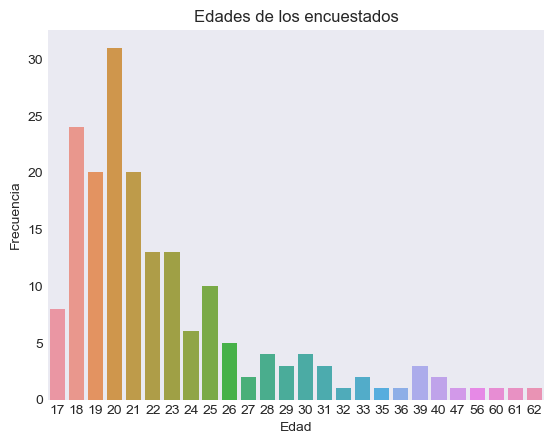

In [355]:
g = sns.countplot(x='Edad', data=df)
g.set_title('Edades de los encuestados')
g.set(xlabel = 'Edad', ylabel = 'Frecuencia')

[Text(0.5, 0, 'Edades'), Text(0, 0.5, 'Frecuencia')]

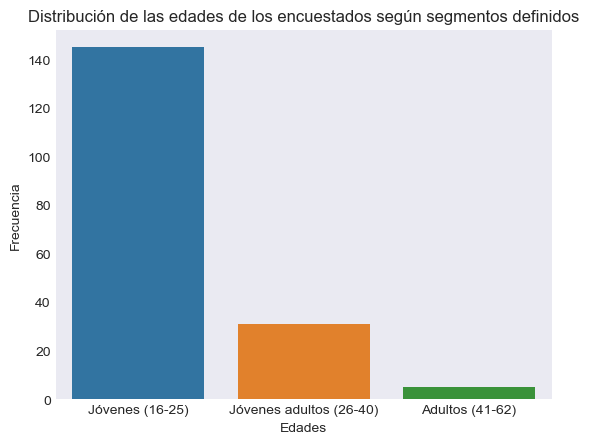

In [359]:
g = sns.countplot(x='Edad_cat', data=df)
g.set_title('Distribución de las edades de los encuestados según segmentos definidos')
g.set(xlabel = 'Edades', ylabel = 'Frecuencia')

[Text(0.5, 0, 'Edades'), Text(0, 0.5, 'Frecuencia')]

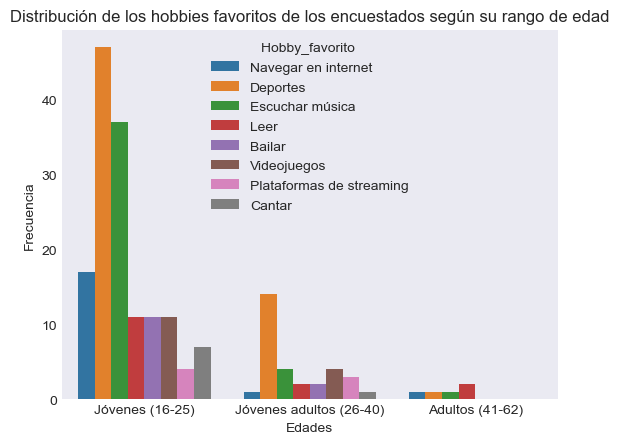

In [426]:
g = sns.countplot(x='Edad_cat', hue='Hobby_favorito ', data=df)
g.set_title('Distribución de los hobbies favoritos de los encuestados según su rango de edad')
g.set(xlabel = 'Edades', ylabel = 'Frecuencia')

[Text(0.5, 0, 'Edades'), Text(0, 0.5, 'Cantidad')]

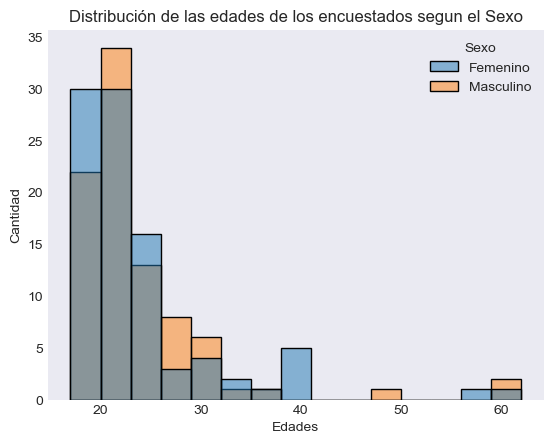

In [301]:
g = sns.histplot(x='Edad', hue='Sexo', bins=15, data=df)
g.set_title('Distribución de las edades de los encuestados segun el Sexo')
g.set(xlabel = 'Edades', ylabel = 'Cantidad')

[Text(0.5, 0, 'Edades'), Text(0, 0.5, 'Cantidad')]

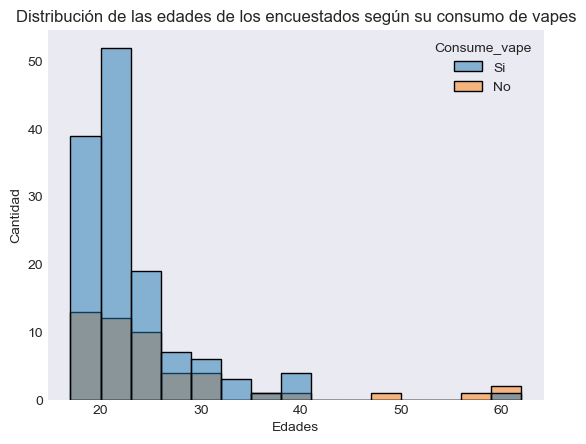

In [302]:
g = sns.histplot(x='Edad', hue='Consume_vape', bins=15, data=df)
g.set_title('Distribución de las edades de los encuestados según su consumo de vapes')
g.set(xlabel = 'Edades', ylabel = 'Cantidad')

[Text(0.5, 0, 'Edades'), Text(0, 0.5, 'Cantidad')]

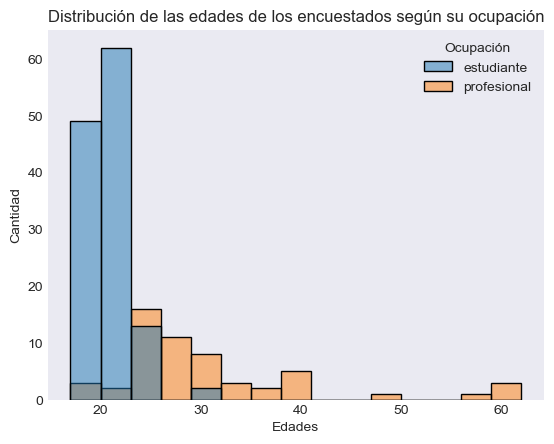

In [303]:
g = sns.histplot(x='Edad', hue='Ocupación', bins=15, data=df)
g.set_title('Distribución de las edades de los encuestados según su ocupación')
g.set(xlabel = 'Edades', ylabel = 'Cantidad')

<h5>Variable Sexo</h5>

In [304]:
df['Sexo'].value_counts()

Femenino     93
Masculino    88
Name: Sexo, dtype: int64

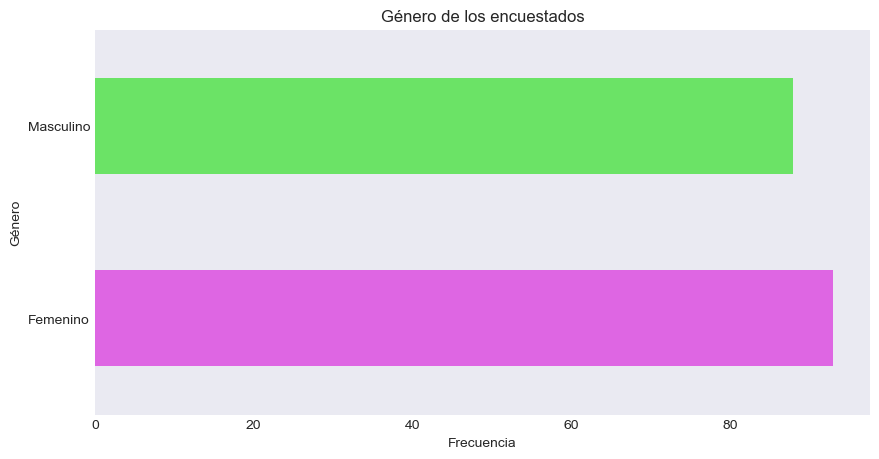

In [356]:
df['Sexo'].value_counts().plot(kind='barh', figsize=(10,5), color=['#de66e3','#6be366'])

plt.title('Género de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()

<h5>Variable Ocupación</h5>

In [307]:
df["Ocupación"].value_counts()

estudiante     126
profesional     55
Name: Ocupación, dtype: int64

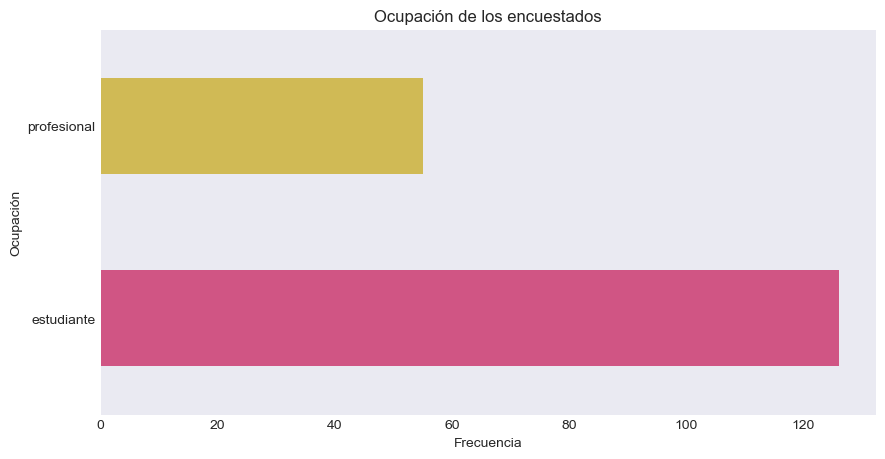

In [357]:
df['Ocupación'].value_counts().plot(kind='barh', figsize=(10,5), color=['#d05584','#d0ba55'])

plt.title('Ocupación de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Ocupación')
plt.show()

<h5>Variable R_S_favorita</h5>

In [309]:
df['R_S_favorita'].value_counts()

Instagram    87
TikTok       61
Facebook     26
Twitter       5
Snapchat      2
Name: R_S_favorita, dtype: int64

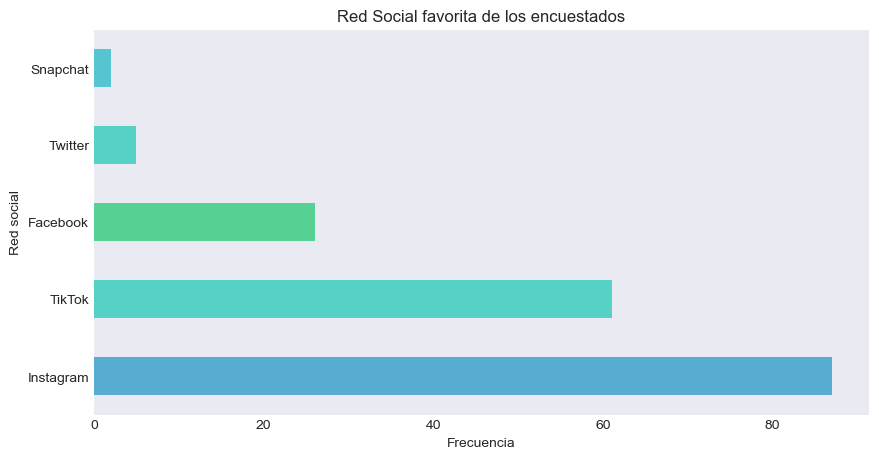

In [358]:
df['R_S_favorita'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Red Social favorita de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Red social')
plt.show()

<h5>Variable Hobby_favorito</h5>

In [311]:
df['Hobby_favorito '].value_counts()

Deportes                    62
Escuchar música             42
Navegar en internet         19
Leer                        15
Videojuegos                 15
Bailar                      13
Cantar                       8
Plataformas de streaming     7
Name: Hobby_favorito , dtype: int64

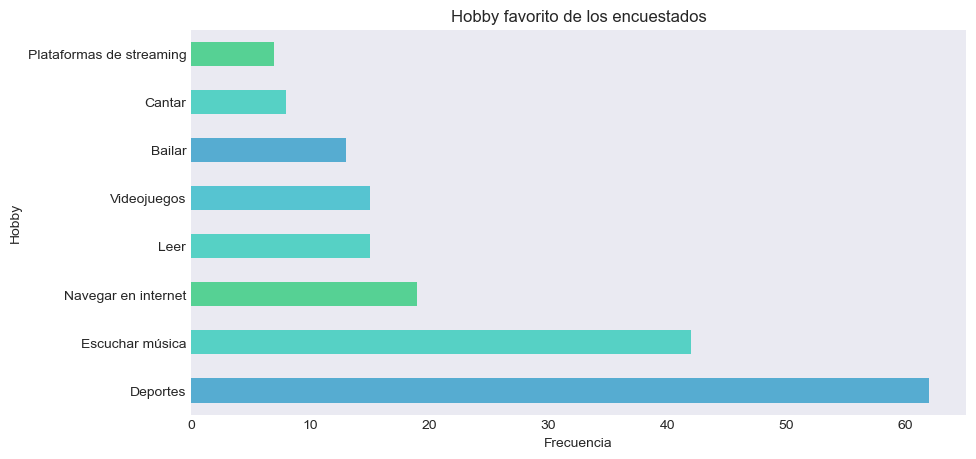

In [360]:
df['Hobby_favorito '].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Hobby favorito de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Hobby')
plt.show()

<h5>Variable Consume_vape</h5>

In [313]:
df['Consume_vape'].value_counts()

Si    132
No     49
Name: Consume_vape, dtype: int64

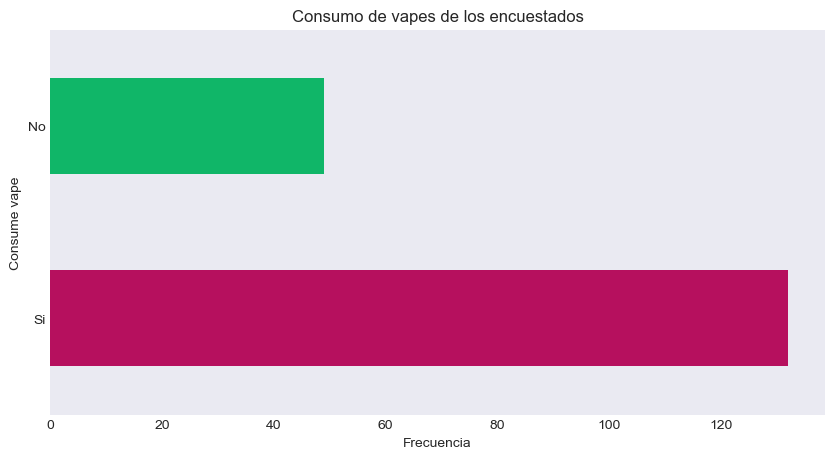

In [361]:
df['Consume_vape'].value_counts().plot(kind='barh', figsize=(10,5), color=['#b6105e','#10b668'])

plt.title('Consumo de vapes de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Consume vape')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Internet (Marketplace o RR.SS.)'),
  Text(1, 0, 'Casa (Delivery)'),
  Text(2, 0, 'Tiendas especializadas'),
  Text(3, 0, 'Supermercados'),
  Text(4, 0, 'Bares'),
  Text(5, 0, 'Boliches'),
  Text(6, 0, 'Universidad'),
  Text(7, 0, 'Vendedores ambulantes')])

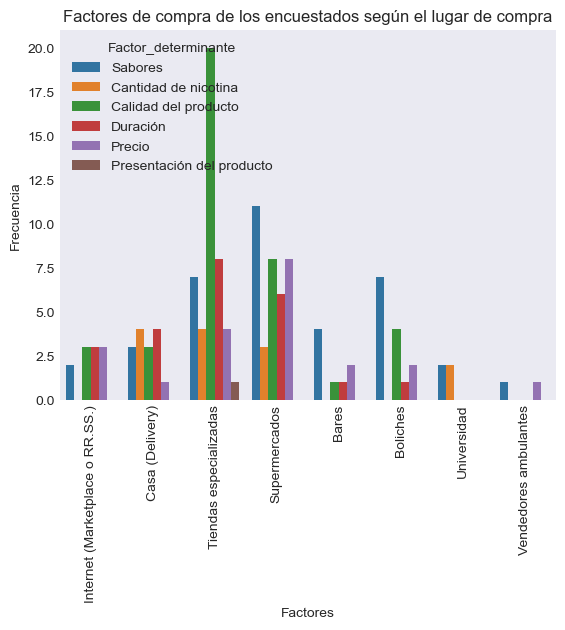

In [445]:
g = sns.countplot(x='Lugar_de_compra', hue='Factor_determinante', data=df)
g.set_title('Factores de compra de los encuestados según el lugar de compra')
g.set(xlabel = 'Factores', ylabel = 'Frecuencia')
plt.xticks(rotation=90)

<h5>Variable Factor_determinante</h5>

In [315]:
df['Factor_determinante'].value_counts()

Calidad del producto         40
Sabores                      39
Duración                     23
Precio                       22
Cantidad de nicotina         14
Presentación del producto     2
no fumo                       1
Name: Factor_determinante, dtype: int64

In [367]:
# Quitamos la respuesta no valida 'no fumo'
df.loc[df.Factor_determinante == 'no fumo ', 'Factor_determinante'] = ''

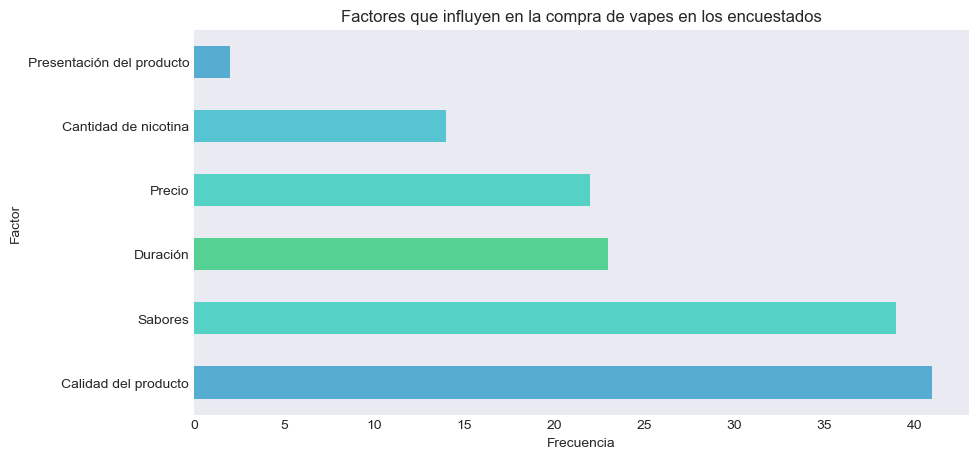

In [368]:
df['Factor_determinante'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Factores que influyen en la compra de vapes en los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Factor')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sabores'),
  Text(1, 0, 'Cantidad de nicotina'),
  Text(2, 0, 'Calidad del producto'),
  Text(3, 0, 'Duración'),
  Text(4, 0, 'Precio'),
  Text(5, 0, 'Presentación del producto'),
  Text(6, 0, 'no fumo ')])

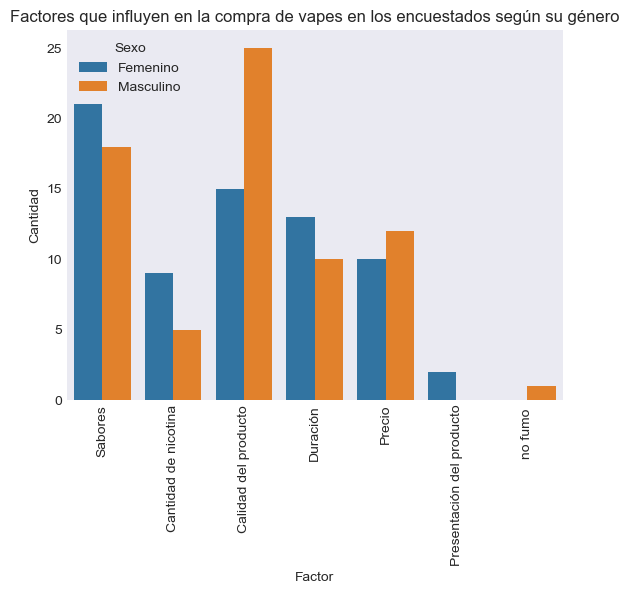

In [317]:
g = sns.countplot(x='Factor_determinante', hue='Sexo', data=df)
g.set_title('Factores que influyen en la compra de vapes en los encuestados según su género')
g.set(xlabel = 'Factor', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Frecuenia_de_consumo</h5>

In [318]:
df['Frecuencia_de_consumo'].value_counts()

Ocasionalmente (Eventos sociales)    88
Todos los días                       27
Tres veces por semana                11
Una vez a la semana                   7
Dos veces por semana                  6
Name: Frecuencia_de_consumo, dtype: int64

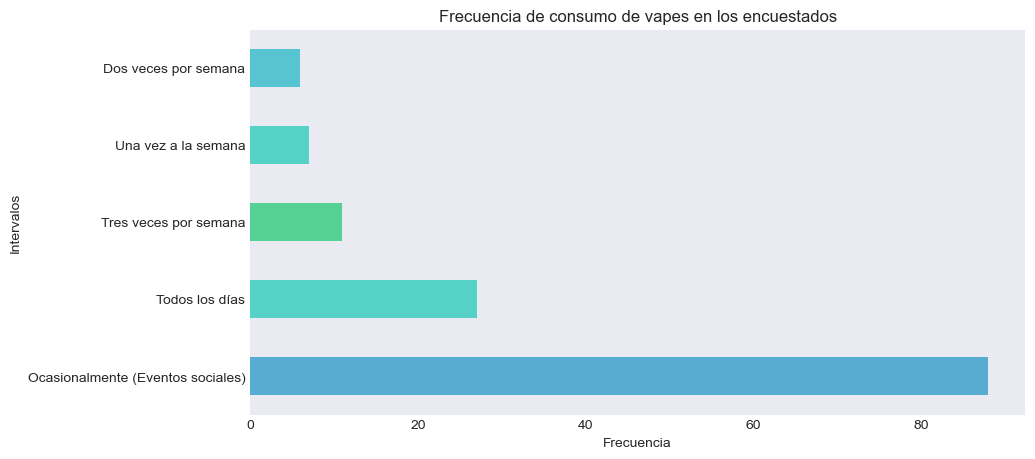

In [369]:
df['Frecuencia_de_consumo'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Frecuencia de consumo de vapes en los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Intervalos')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ocasionalmente (Eventos sociales)'),
  Text(1, 0, 'Una vez a la semana'),
  Text(2, 0, 'Tres veces por semana'),
  Text(3, 0, 'Dos veces por semana'),
  Text(4, 0, 'Todos los días')])

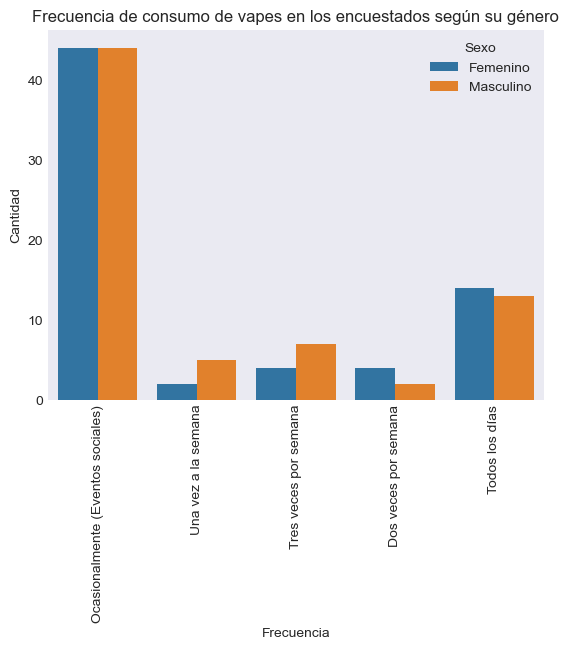

In [320]:
g = sns.countplot(x='Frecuencia_de_consumo', hue='Sexo', data=df)
g.set_title('Frecuencia de consumo de vapes en los encuestados según su género')
g.set(xlabel = 'Frecuencia', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Lugar_de_compra</h5>

In [321]:
df['Lugar_de_compra'].value_counts()

Tiendas especializadas             44
Supermercados                      36
Casa (Delivery)                    15
Boliches                           14
Internet (Marketplace o RR.SS.)    11
Bares                               8
Universidad                         4
Vendedores ambulantes               2
Name: Lugar_de_compra, dtype: int64

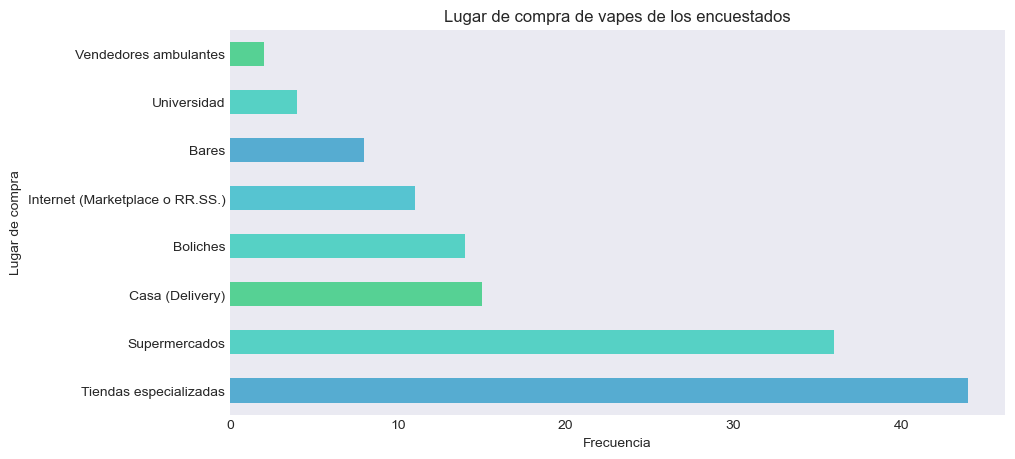

In [370]:
df['Lugar_de_compra'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Lugar de compra de vapes de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Lugar de compra')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Internet (Marketplace o RR.SS.)'),
  Text(1, 0, 'Casa (Delivery)'),
  Text(2, 0, 'Tiendas especializadas'),
  Text(3, 0, 'Supermercados'),
  Text(4, 0, 'Bares'),
  Text(5, 0, 'Boliches'),
  Text(6, 0, 'Universidad'),
  Text(7, 0, 'Vendedores ambulantes')])

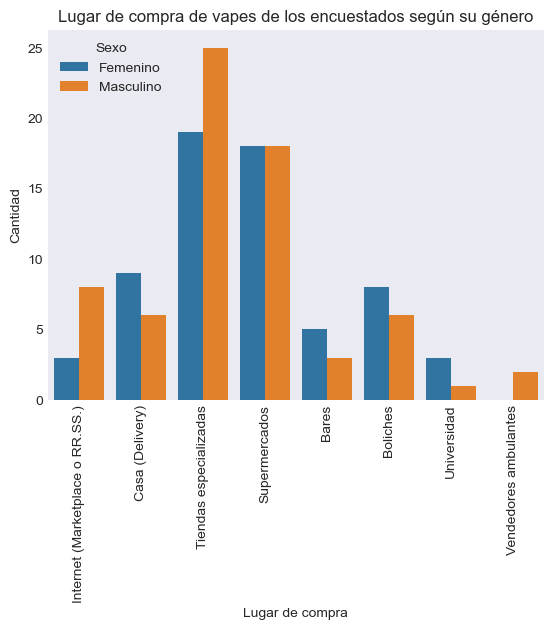

In [323]:
g = sns.countplot(x='Lugar_de_compra', hue='Sexo', data=df)
g.set_title('Lugar de compra de vapes de los encuestados según su género')
g.set(xlabel = 'Lugar de compra', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Duracion_vape</h5>

In [324]:
df['Duracion_vape'].value_counts()

Más de un mes    36
Una semana       27
Un mes           24
Dos semanas      19
Tres días        16
Un día            8
Name: Duracion_vape, dtype: int64

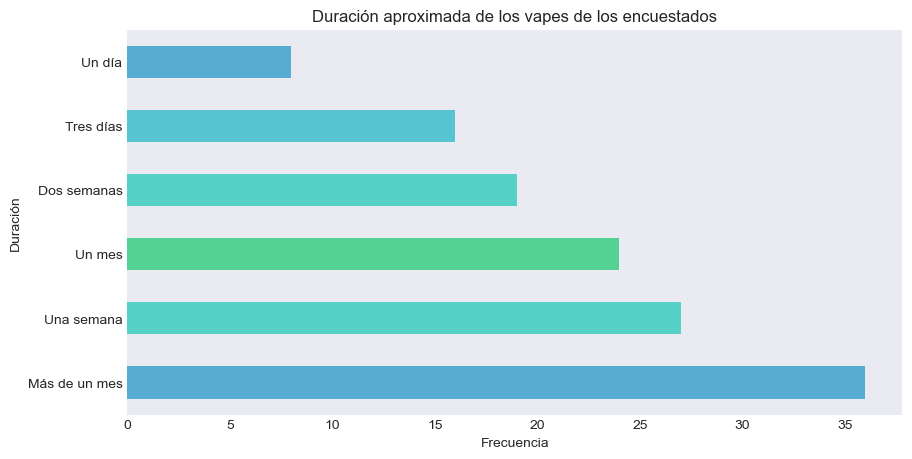

In [371]:
df['Duracion_vape'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Duración aproximada de los vapes de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Duración')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Más de un mes'),
  Text(1, 0, 'Dos semanas'),
  Text(2, 0, 'Un día'),
  Text(3, 0, 'Una semana'),
  Text(4, 0, 'Un mes'),
  Text(5, 0, 'Tres días')])

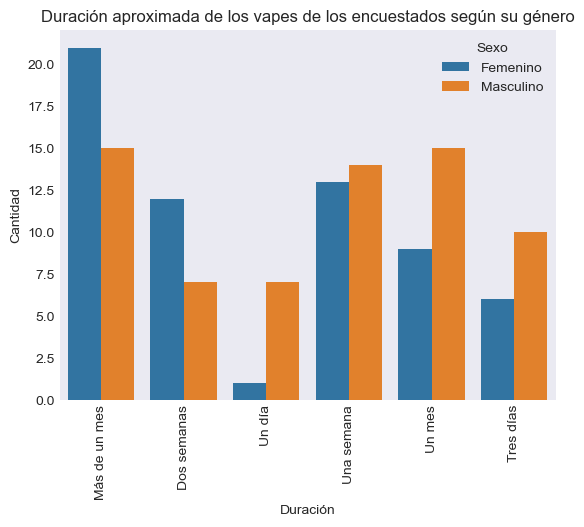

In [326]:
g = sns.countplot(x='Duracion_vape', hue='Sexo', data=df)
g.set_title('Duración aproximada de los vapes de los encuestados según su género')
g.set(xlabel = 'Duración', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Mg_nicotina</h5>

In [327]:
df['Mg_nicotina'].value_counts()

6 Mg            36
3 Mg            36
1,5 Mg          30
0 Mg            21
Más de 18 Mg     4
12 Mg            3
18 Mg            2
Name: Mg_nicotina, dtype: int64

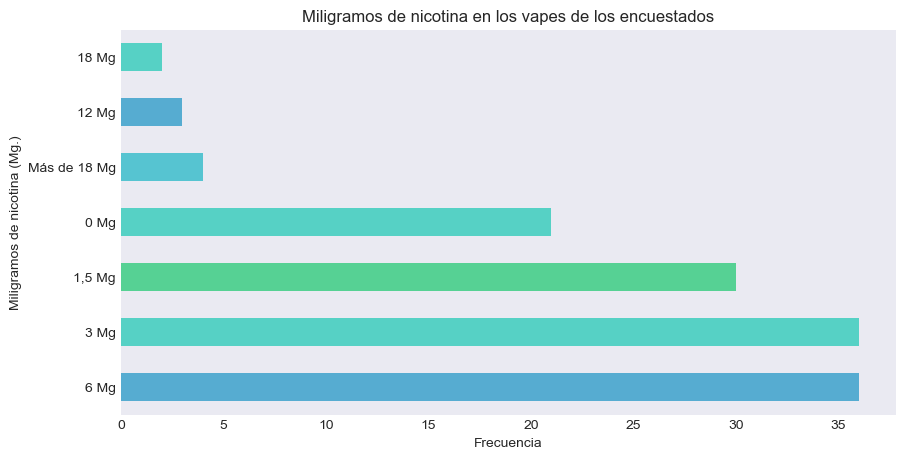

In [372]:
df['Mg_nicotina'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Miligramos de nicotina en los vapes de los encuestados')
plt.xlabel('Frecuencia')
plt.ylabel('Miligramos de nicotina (Mg.)')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0 Mg'),
  Text(1, 0, '6 Mg'),
  Text(2, 0, '1,5 Mg'),
  Text(3, 0, 'Más de 18 Mg'),
  Text(4, 0, '3 Mg'),
  Text(5, 0, '12 Mg'),
  Text(6, 0, '18 Mg')])

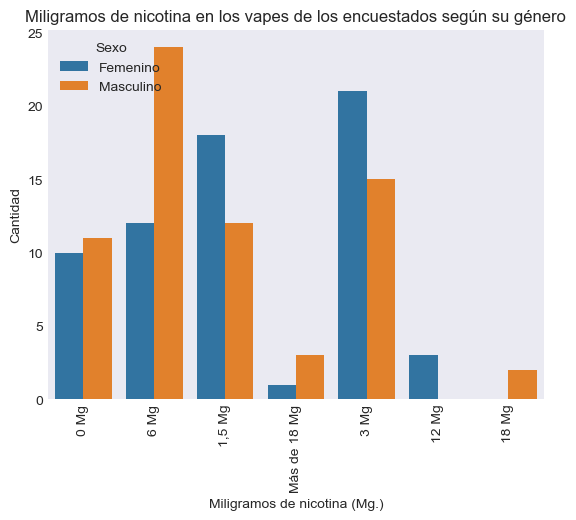

In [329]:
g = sns.countplot(x='Mg_nicotina', hue='Sexo', data=df)
g.set_title('Miligramos de nicotina en los vapes de los encuestados según su género')
g.set(xlabel = 'Miligramos de nicotina (Mg.)', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Cantidad_mensual</h5>

In [330]:
df['Cantidad_mensual'].value_counts()

1           78
2           22
3           13
Más de 5    10
4            6
5            2
Name: Cantidad_mensual, dtype: int64

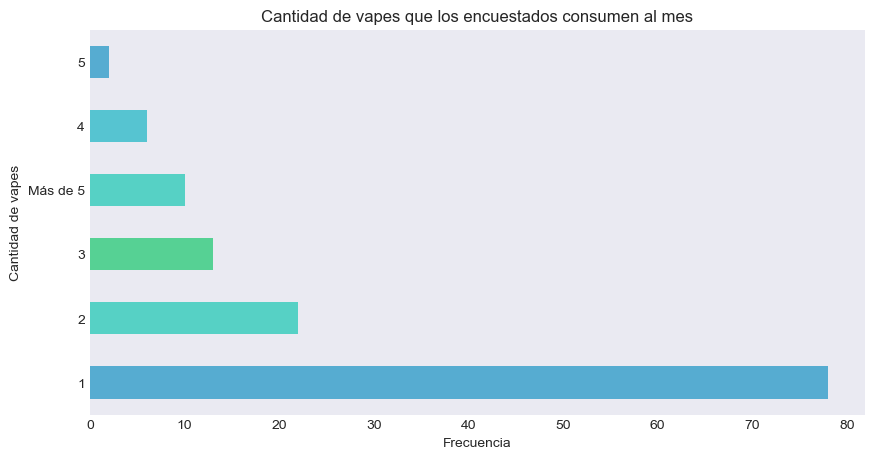

In [373]:
df['Cantidad_mensual'].value_counts().plot(kind='barh', figsize=(10,5), color=['#56acd1','#56d1c5','#56d194','#56d1c5','#56c4d1'])

plt.title('Cantidad de vapes que los encuestados consumen al mes')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de vapes')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, 'Más de 5'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

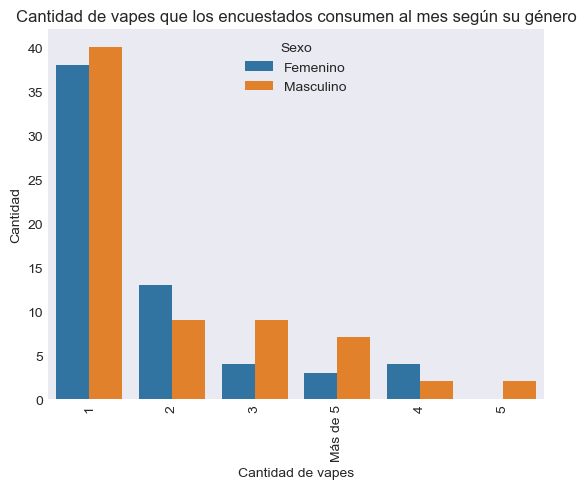

In [332]:
g = sns.countplot(x='Cantidad_mensual', hue='Sexo', data=df)
g.set_title('Cantidad de vapes que los encuestados consumen al mes según su género')
g.set(xlabel = 'Cantidad de vapes', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Precio_preferencial</h5>

In [334]:
df['Precio_preferencial'].describe()

count     130.000000
mean      153.461538
std       211.333755
min         0.000000
25%        80.000000
50%       100.000000
75%       150.000000
max      2000.000000
Name: Precio_preferencial, dtype: float64

[Text(0.5, 0, 'Precios'), Text(0, 0.5, 'Frecuencia')]

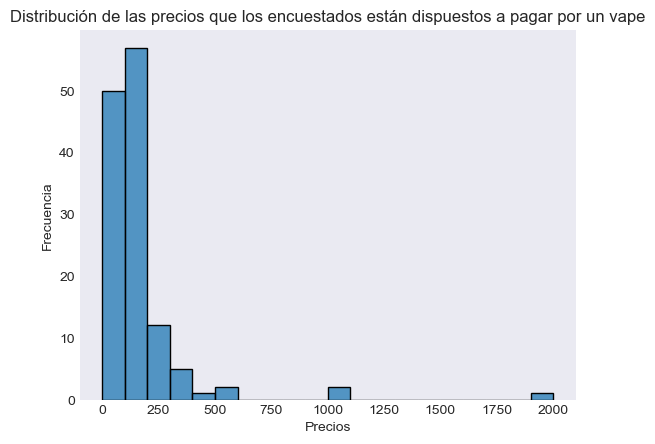

In [374]:
g = sns.histplot(x='Precio_preferencial', bins=20, data=df)
g.set_title('Distribución de las precios que los encuestados están dispuestos a pagar por un vape')
g.set(xlabel = 'Precios', ylabel = 'Frecuencia')

[Text(0.5, 0, 'Precios'), Text(0, 0.5, 'Cantidad')]

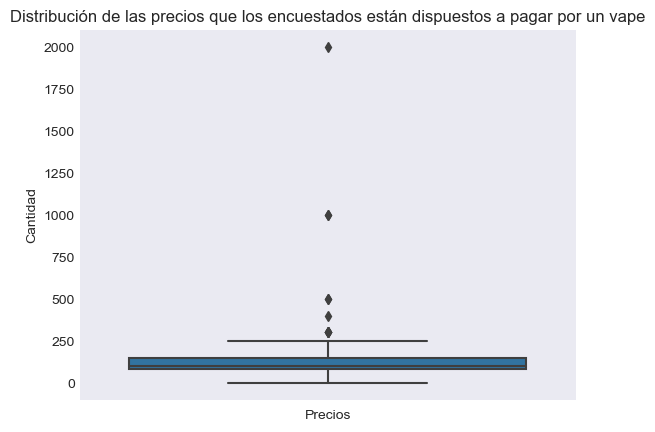

In [336]:
g = sns.boxplot(y='Precio_preferencial', data=df)
g.set_title('Distribución de las precios que los encuestados están dispuestos a pagar por un vape')
g.set(xlabel = 'Precios', ylabel = 'Cantidad')

<h5>Variable Sintomas</h5>

In [337]:
# Seleccionamos todas las columnas del df que corresponden a un síntoma
sintomas = list(df.columns[17:])

# Creamos una lista vacía para la frecuencia de cada síntoma
sintomas_sumas = []

# Iteramos sobre todas las columnas de síntomas y extraemos la frecuencia de cada síntoma añadiendolas a la lista
for sintoma in sintomas:
    suma = df[sintoma].sum()
    sintomas_sumas.append(suma)

# Creamos un nuevo df con la frecuencia de cada síntoma y lo ordenamos de manera descendente
sintomas_dict = {'Sintoma': sintomas, 'Cantidad': sintomas_sumas}
sintomas_grafico = pd.DataFrame(sintomas_dict)
sintomas_grafico = sintomas_grafico.sort_values('Cantidad', ascending=False)

sintomas_grafico

,Sintoma,Cantidad
6,No he presentado ningún síntoma,61
0,Ansiedad,44
2,Cansancio,28
4,Dificultad para dormir,27
1,Boca seca,18
3,Dificultad para concentrarse,17
5,Dolor de cabeza,16
9,Tos repentina,16
7,Otro síntoma,8
8,Problemas para respirar,7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No he presentado ningún síntoma'),
  Text(1, 0, 'Ansiedad'),
  Text(2, 0, 'Cansancio'),
  Text(3, 0, 'Dificultad para dormir'),
  Text(4, 0, 'Boca seca'),
  Text(5, 0, 'Dificultad para concentrarse'),
  Text(6, 0, 'Dolor de cabeza'),
  Text(7, 0, 'Tos repentina'),
  Text(8, 0, 'Otro síntoma'),
  Text(9, 0, 'Problemas para respirar')])

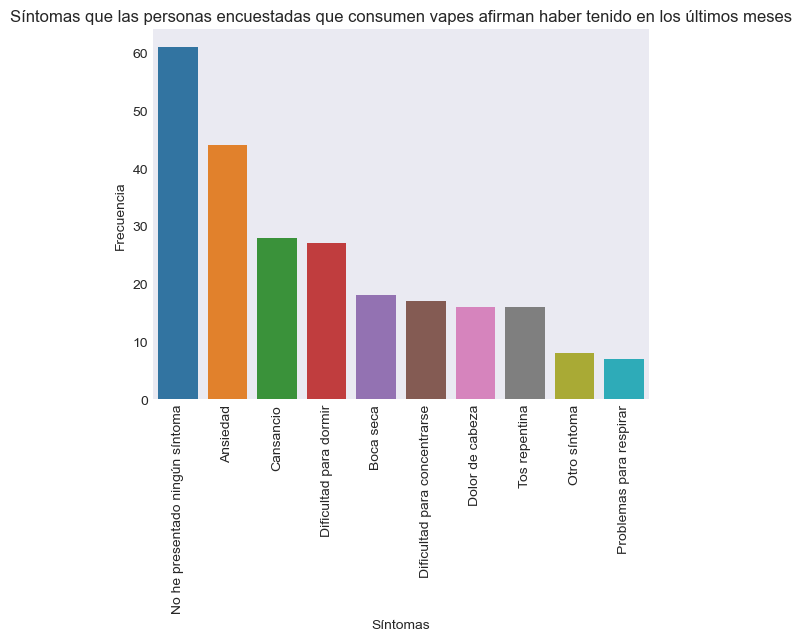

In [375]:
g = sns.barplot(x='Sintoma', y='Cantidad', data=sintomas_grafico)
g.set_title('Síntomas que las personas encuestadas que consumen vapes afirman haber tenido en los últimos meses')
g.set(xlabel = 'Síntomas', ylabel = 'Frecuencia')
plt.xticks(rotation=90)

<h5>Variable Tipo_de_vape</h5>

In [339]:
df['Tipo_de_vape'].value_counts()

Desechable    99
Recargable    34
Name: Tipo_de_vape, dtype: int64

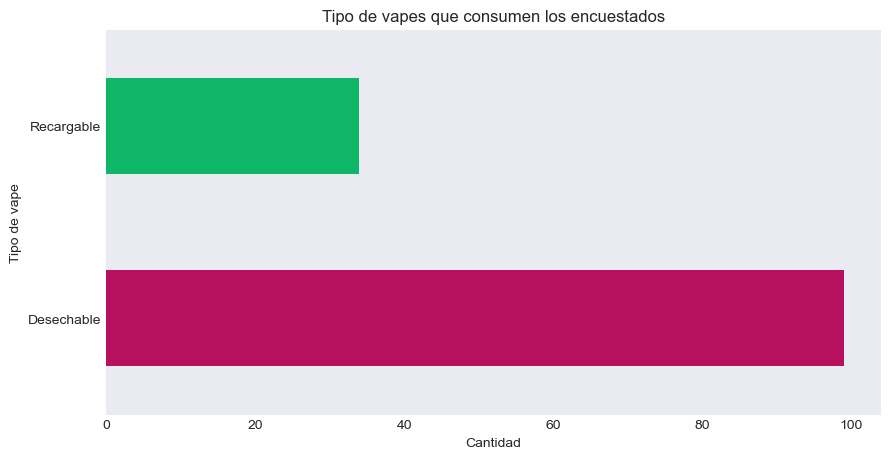

In [340]:
df['Tipo_de_vape'].value_counts().plot(kind='barh', figsize=(10,5), color=['#b6105e','#10b668'])

plt.title('Tipo de vapes que consumen los encuestados')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de vape')
plt.show()

(array([0, 1]), [Text(0, 0, 'Desechable'), Text(1, 0, 'Recargable')])

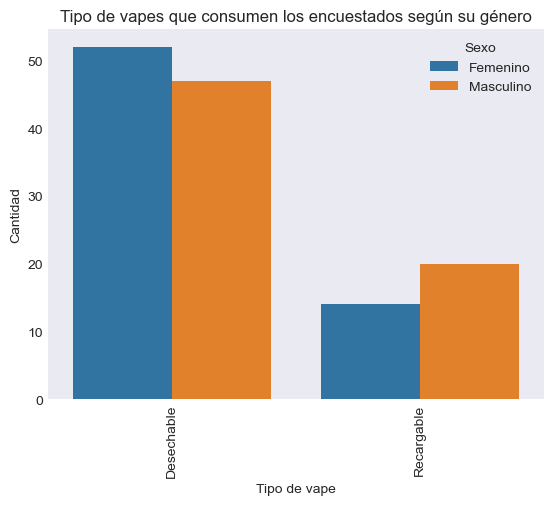

In [341]:
g = sns.countplot(x='Tipo_de_vape', hue='Sexo', data=df)
g.set_title('Tipo de vapes que consumen los encuestados según su género')
g.set(xlabel = 'Tipo de vape', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Marca_preferida</h5>

In [378]:
df['Marca_preferida'].value_counts()

Waka         71
Maskking     20
SMOK         13
Fume          6
GeekVape      4
Vaporesso     3
No uso        1
.             1
Hqd           1
Joyetech      1
Juul          1
Lost mary     1
Voopoo        1
Innokin       1
Frunkpod      1
Aspire        1
Pacha         1
Voom          1
Name: Marca_preferida, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Maskking'),
  Text(1, 0, 'Aspire'),
  Text(2, 0, 'SMOK'),
  Text(3, 0, 'Waka'),
  Text(4, 0, 'Fume'),
  Text(5, 0, '.'),
  Text(6, 0, 'Juul'),
  Text(7, 0, 'Innokin'),
  Text(8, 0, 'Joyetech'),
  Text(9, 0, 'Vaporesso'),
  Text(10, 0, 'Hqd '),
  Text(11, 0, 'Lost mary'),
  Text(12, 0, 'Frunkpod'),
  Text(13, 0, 'Pacha'),
  Text(14, 0, 'GeekVape'),
  Text(15, 0, 'Voom'),
  Text(16, 0, 'Voopoo'),
  Text(17, 0, 'No uso')])

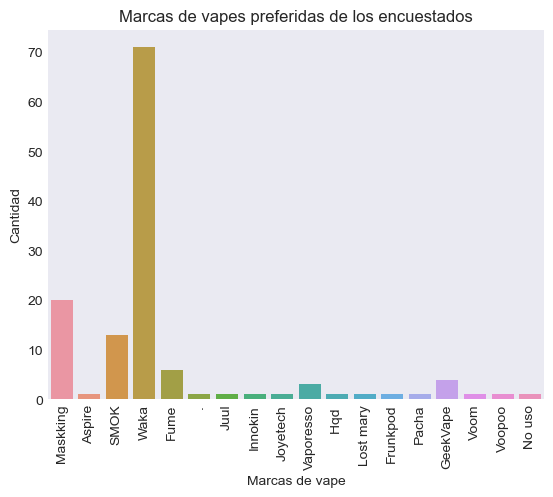

In [343]:
g = sns.countplot(x='Marca_preferida', data=df)
g.set_title('Marcas de vapes preferidas de los encuestados')
g.set(xlabel ='Marcas de vape', ylabel = 'Cantidad')
plt.xticks(rotation=90)

<h5>Variable Sabor_preferido</h5>

In [380]:
df['Sabor_preferido'].value_counts()

Frutilla               27
Sandía                 25
Menta                  23
Uva                    21
Mango                  11
Banana/coco             8
Maracuyá                5
Manzana verde           4
Cherry                  3
Kiwi                    2
No uso                  1
Oreo                    1
Tortitas y galletas     1
Berry                   1
Blueberry               1
Arándanos               1
Cherry                  1
banana/frutilla         1
Name: Sabor_preferido, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Sandía'),
  Text(1, 0, 'Mango'),
  Text(2, 0, 'Maracuyá'),
  Text(3, 0, 'Frutilla'),
  Text(4, 0, 'Menta'),
  Text(5, 0, 'Uva'),
  Text(6, 0, 'Tortitas y galletas'),
  Text(7, 0, 'Arándanos '),
  Text(8, 0, 'banana/frutilla'),
  Text(9, 0, 'Manzana verde'),
  Text(10, 0, 'Oreo'),
  Text(11, 0, 'Banana/coco'),
  Text(12, 0, 'Berry'),
  Text(13, 0, 'Blueberry '),
  Text(14, 0, 'Cherry '),
  Text(15, 0, 'Cherry'),
  Text(16, 0, 'No uso'),
  Text(17, 0, 'Kiwi')])

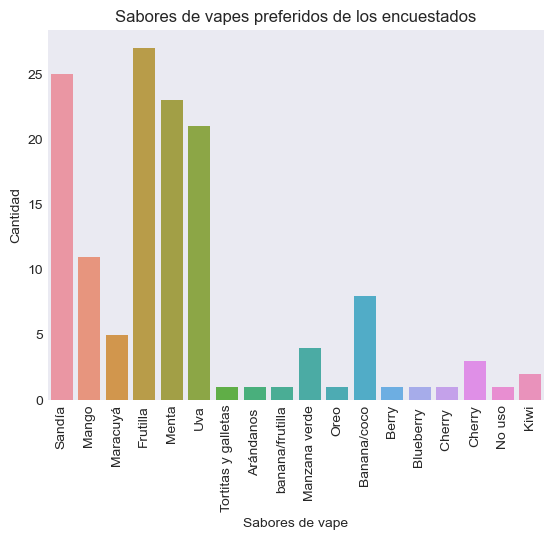

In [345]:
g = sns.countplot(x='Sabor_preferido', data=df)
g.set_title('Sabores de vapes preferidos de los encuestados')
g.set(xlabel ='Sabores de vape', ylabel = 'Cantidad')
plt.xticks(rotation=90)